In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [3]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [4]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [5]:
# reflect an existing database into a new model

# reflect the tables

Base = automap_base()
Base.prepare(engine, reflect=True)


/var/folders/kw/x89bt7710xqbpwnvqqc6rfzh0000gn/T/ipykernel_93031/2609562552.py:6: SADeprecationWarning: The AutomapBase.prepare.reflect parameter is deprecated and will be removed in a future release.  Reflection is enabled when AutomapBase.prepare.autoload_with is passed.
  Base.prepare(engine, reflect=True)


In [6]:
# View all of the classes that automap found

Base.classes.keys()


['station', 'measurement']

In [7]:
# Save references to each table

Measurement = Base.classes.measurement
Station = Base.classes.station


In [8]:
# Create our session (link) from Python to the DB

from sqlalchemy.orm import Session
session = Session(engine)


# Exploratory Precipitation Analysis

In [9]:
# Find the most recent date in the data set.

most_recent_date = session.query(Measurement.date).order_by(Measurement.date.desc()).first()
print(f"The most recent date in the dataset is: {most_recent_date[0]}")


The most recent date in the dataset is: 2017-08-23


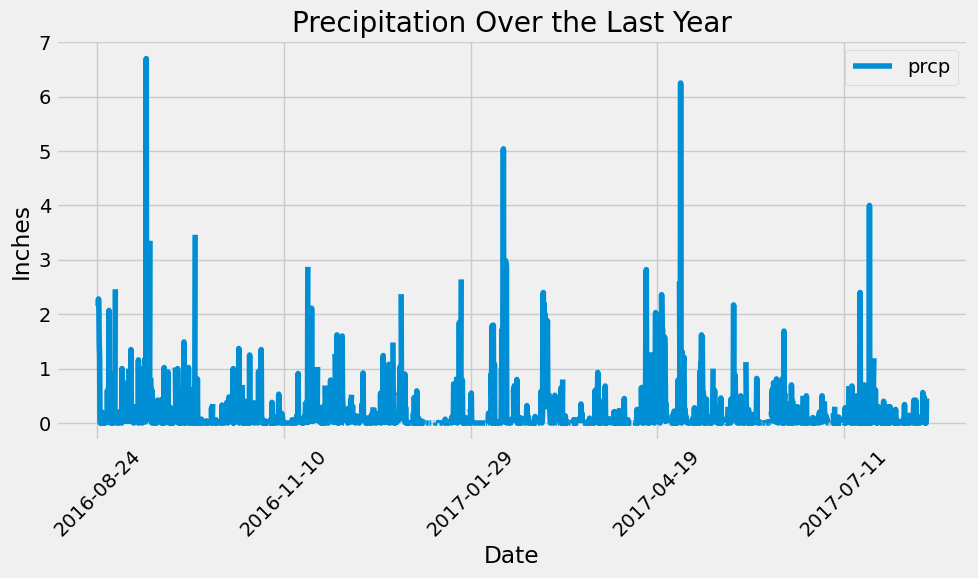

In [10]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 

# Calculate the date one year from the last date in data set.

import datetime as dt
last_date = dt.datetime.strptime('2017-08-23', '%Y-%m-%d')
one_year_ago = last_date - dt.timedelta(days=365)


# Perform a query to retrieve the data and precipitation scores

precipitation_data = session.query(Measurement.date, Measurement.prcp).filter(Measurement.date >= one_year_ago).all()


# Save the query results as a Pandas DataFrame. Explicitly set the column names

precipitation_df = pd.DataFrame(precipitation_data, columns=['date', 'prcp'])


# Sort the dataframe by date

precipitation_df = precipitation_df.sort_values('date')


# Use Pandas Plotting with Matplotlib to plot the data

import matplotlib.pyplot as plt

precipitation_df.plot(x='date', y='prcp', figsize=(10, 6), rot=45, legend=True, title="Precipitation Over the Last Year")
plt.xlabel('Date')
plt.ylabel('Inches')
plt.tight_layout()
plt.show()


In [11]:
# Use Pandas to calculate the summary statistics for the precipitation data

precipitation_df.describe()


,prcp
count,2015.000000
mean,0.176462
std,0.460288
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


# Exploratory Station Analysis

In [12]:
# Design a query to calculate the total number of stations in the dataset

total_stations = session.query(Station.id).count()
print(f"Total number of stations: {total_stations}")


Total number of stations: 9


In [13]:
# Design a query to find the most active stations (i.e. which stations have the most rows?)
# List the stations and their counts in descending order.

from sqlalchemy import func

most_active_stations = session.query(Measurement.station, func.count(Measurement.station)).\
    group_by(Measurement.station).\
    order_by(func.count(Measurement.station).desc()).all()

for station, count in most_active_stations:
    print(f"Station: {station}, Count: {count}")


Station: USC00519281, Count: 2772
Station: USC00519397, Count: 2724
Station: USC00513117, Count: 2709
Station: USC00519523, Count: 2669
Station: USC00516128, Count: 2612
Station: USC00514830, Count: 2202
Station: USC00511918, Count: 1979
Station: USC00517948, Count: 1372
Station: USC00518838, Count: 511


In [14]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.

most_active_station_id = most_active_stations[0][0]  # 'USC00519281'

temperature_stats = session.query(
    func.min(Measurement.tobs),
    func.max(Measurement.tobs),
    func.avg(Measurement.tobs)
).filter(Measurement.station == most_active_station_id).all()

print(f"Temperature statistics for station {most_active_station_id}:")
print(f"Lowest temperature: {temperature_stats[0][0]}°F")
print(f"Highest temperature: {temperature_stats[0][1]}°F")
print(f"Average temperature: {temperature_stats[0][2]:.2f}°F")


Temperature statistics for station USC00519281:
Lowest temperature: 54.0°F
Highest temperature: 85.0°F
Average temperature: 71.66°F


Temperature statistics for station USC00519281:
Lowest temperature: 54.0°F
Highest temperature: 85.0°F
Average temperature: 71.66°F


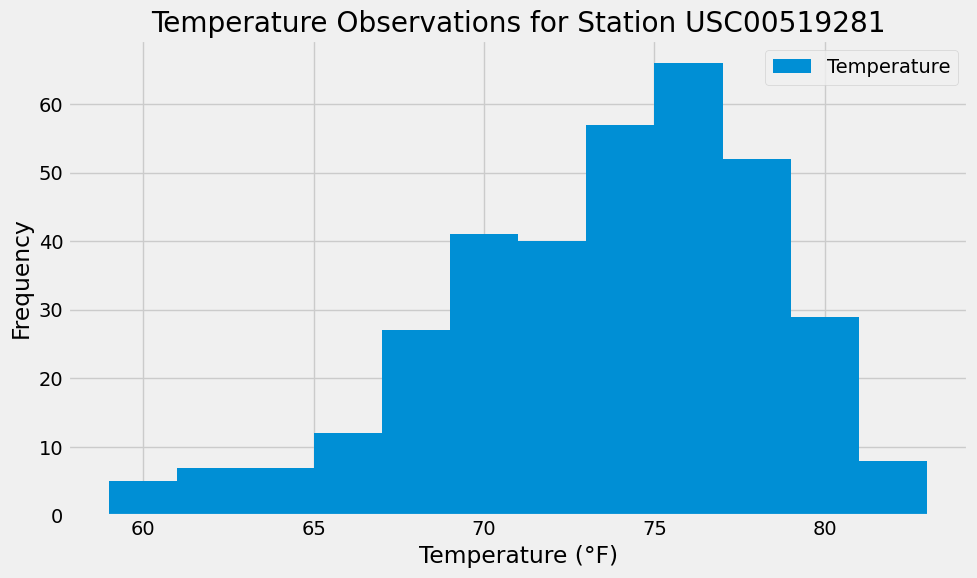

In [15]:
# Using the most active station id

most_active_station_id = most_active_stations[0][0]  # 'USC00519281'

temperature_stats = session.query(
    func.min(Measurement.tobs),
    func.max(Measurement.tobs),
    func.avg(Measurement.tobs)
).filter(Measurement.station == most_active_station_id).all()

print(f"Temperature statistics for station {most_active_station_id}:")
print(f"Lowest temperature: {temperature_stats[0][0]}°F")
print(f"Highest temperature: {temperature_stats[0][1]}°F")
print(f"Average temperature: {temperature_stats[0][2]:.2f}°F")

# Query the last 12 months of temperature observation data for this station and plot the results as a histogram

temperature_data = session.query(Measurement.tobs).\
    filter(Measurement.station == most_active_station_id).\
    filter(Measurement.date >= one_year_ago).all()

# Convert to a Pandas DataFrame
temperature_df = pd.DataFrame(temperature_data, columns=['Temperature'])

# Plot the results as a histogram
temperature_df.plot.hist(bins=12, figsize=(10, 6), title=f"Temperature Observations for Station {most_active_station_id}")
plt.xlabel("Temperature (°F)")
plt.ylabel("Frequency")
plt.tight_layout()
plt.show()


# Close Session

In [16]:
# Close Session
session.close()